Our overall goal is to classify texts based on the school of philosophy they come from. If we can do this, we should be able to build an app that can take user input and classify it, thus giving us insight into what school of thought new texts might represent or be aligned with.

We chose to work with 9 schools of thought, representing nearly 2000 years of the history of western philosophy.

- Plato
- Aristotle
- the Rationalists
- the Empiricists
- the German Idealists
- Analytic Philosophy, which can be broken down into:
    - early Analytic
    - contemporary Analytic
- Phenomenology
- Contintental Philosophy

The following cell reads our source texts; some are from Project Gutenberg, while others are sourced independently.


In [6]:
from functions import *


In [7]:
# load the texts

## plato
plato_complete = get_text('.\phil_txts\plato_complete_works.txt')

# aristotle
aristotle_vol1 = get_text('.\phil_txts\\aristotle_complete_works_v1.txt')
aristotle_vol2 = get_text('.\phil_txts\\aristotle_complete_works_v2.txt')

## rationalists
spinoza_ethics = get_guten('http://www.gutenberg.org/cache/epub/3800/pg3800.txt')
spinoza_improve_understanding = get_guten('http://www.gutenberg.org/cache/epub/1016/pg1016.txt')
leibniz_theodicy = get_guten('http://www.gutenberg.org/cache/epub/17147/pg17147.txt')
descartes_discourse_method = get_guten('http://www.gutenberg.org/cache/epub/59/pg59.txt')
descartes_meditations = get_text('.\phil_txts\descartes_meditations.txt')
malebranche_search_truth = get_text('.\phil_txts\malebranche_search_truth.txt')

## empiricists
locke_understanding_1 = get_guten('http://www.gutenberg.org/cache/epub/10615/pg10615.txt')
locke_understanding_2 = get_guten('http://www.gutenberg.org/cache/epub/10616/pg10616.txt')
locke_treatise_gov = get_guten('http://www.gutenberg.org/cache/epub/7370/pg7370.txt')
hume_treatise = get_guten('http://www.gutenberg.org/cache/epub/4705/pg4705.txt')
hume_natural_religion = get_guten('http://www.gutenberg.org/cache/epub/4583/pg4583.txt')
berkeley_treatise = get_guten('http://www.gutenberg.org/cache/epub/4723/pg4723.txt')
berkeley_three_dialogues = get_guten('http://www.gutenberg.org/cache/epub/4724/pg4724.txt')

## german idealism
kant_practical_reason = get_text('.\phil_txts\kant_critique_practical_reason.txt')
kant_judgement = get_text('.\phil_txts\kant_critique_judgement.txt')
kant_pure_reason = get_text('.\phil_txts\kant_pure_reason.txt')
fichte_ethics = get_text('.\phil_txts\\fichte_system_of_ethics.txt')
hegel_logic = get_text('.\phil_txts\hegel_science_of_logic.txt')
hegel_phenomenology = get_text('.\phil_txts\hegel_phenomenology_of_spirit.txt')
hegel_right = get_text('.\phil_txts\hegel_elements_of_right.txt')

## early analytic
russell_problems_of_phil = get_guten('http://www.gutenberg.org/cache/epub/5827/pg5827.txt')
# russell_analylsis_of_mind = get_guten('http://www.gutenberg.org/cache/epub/2529/pg2529.txt')
moore_studies = get_guten('http://www.gutenberg.org/files/50141/50141-0.txt')
# moore_principia = get_guten('http://www.gutenberg.org/files/53430/53430-0.txt')
wittgenstein_tractatus = get_text('.\phil_txts\wittgenstein_tractatus.txt')
wittgenstein_investigations = get_text('.\phil_txts\wittgenstien_philosophical_investigations.txt')

## modern analytic
lewis_papers1 = get_text('.\phil_txts\lewis_papers_1.txt')
# lewis_papers2 = get_text('.\phil_txts\lewis_papers_2.txt')
quine_quintessence = get_text('.\phil_txts\quine_quintessence.txt')
popper_science = get_text('.\phil_txts\popper_logic_of_science.txt')
# popper_open_society = get_text('.\phil_txts\popper_open_society.txt')
# kripke_troubles = get_text('.\phil_txts\kripke_philosophical_troubles.txt')
kripke_naming = get_text('.\phil_txts\kripke_naming_necessity.txt')

## phenomenology
ponty_perception = get_text('.\phil_txts\merleau-ponty_phenomenology_of_perception.txt')
husserl_idea_of = get_text('.\phil_txts\husserl_idea_of_phenomenology.txt')
husserl_crisis = get_text('.\phil_txts\husserl_crisis_of_euro_sciences.txt')
husserl_cartesian = get_text('.\phil_txts\husserl_cartesian_meditations.txt')
heidegger_being_time = get_text('.\phil_txts\heidegger_being_and_time.txt')
heidegger_track = get_text('.\phil_txts\heidegger_off_the_beaten_track.txt')

## continental
foucault_order = get_text('.\phil_txts\\foucault_order_of_things.txt')
foucault_madness = get_text('.\phil_txts\\foucault_history_of_madness.txt')
foucault_clinic = get_text('.\phil_txts\\foucault_birth_of_clinic.txt')
derrida_writing = get_text('.\phil_txts\derrida_writing_difference.txt')
deleuze_oedipus = get_text('.\phil_txts\deleuze_guattari_anti-oedipus.txt')
deleuze_difference = get_text('.\phil_txts\deleuze_difference_repetition.txt')

Unfortunately, most of these texts include front and end-matter. There isn't a clear and consistent way that these are differentiated, so we go through them one by one to clip the ends and get the actual philosophical discussion. Some texts include footnotes from translators or editors as well, but removing those would be more time consuming than we can really do here. So we leave those footnotes as a kind of noise in our data, and hope to remove them in a future iteration.

In [8]:
plato_complete = plato_complete.split('find that an enticing')[1][388:].split('Demeter, whose cult at')[0]
aristotle_vol_1 = aristotle_vol1.split('1a20-1b9')[1].split('799a16')[0]
aristotle_vol_2 = aristotle_vol2.split('830a5-830b4')[1].split('1462a5-1462a13')[0]
spinoza_ethics = spinoza_ethics.split('ranslated from the Latin by R.')[1][71:].split('End of the Ethics')[0]
spinoza_improve_understanding = spinoza_improve_understanding.split('Farewell.*')[1][20:].split('End of ')[0]
leibniz_theodicy = leibniz_theodicy.split('appeared in 1710 as the')[1][202:].split('SUMMARY OF THE CON')[0][:-140]
descartes_discourse_method = descartes_discourse_method.split('PREFATORY NOTE')[1][18:].split('End of the Pr')[0]
descartes_meditations = descartes_meditations.split('LETTER')[1][1:].split('EXPLANATORY NOTES')[0][:-8]
locke_understanding_1 = locke_understanding_1.split('2 Dorset Court, 24th of May, 1689')[1][50:].split('End of the Pro')[0][:-30]
locke_understanding_2 = locke_understanding_2.split('1. Man fitted to form articulated Sounds.')[1][4:].split('End of the Pro')[0][:-25]
malebranche_search_truth = malebranche_search_truth.split("n's Mind and the Use H")[1][64:].split('Beati qui')[0]
locke_treatise_gov = locke_treatise_gov.split('now lodged in Christ College, Cambridge.')[1][21:].split('FINIS.')[0]
hume_treatise = hume_treatise.split('ADVERTISEMENT')[1][9:].split('End of Pro')[0][:-14]
hume_natural_religion = hume_natural_religion.split('PAMPHILUS TO HERMIPPUS')[1][6:].split('End of the Pro')[0][:-22]
berkeley_treatise = berkeley_treatise.split('are too apt to condemn an opinion before they rightly')[1][47:].split('End of the Pr')[0][:-22]
berkeley_three_dialogues = berkeley_three_dialogues.split('THE FIRST DIALOGUE')[1][17:].split('End of the Pro')[0][:-22]
kant_practical_reason = kant_practical_reason.split('erner Pluhar an')[1][329:].split('stone of the wi')[0][:-20]
kant_judgement = kant_judgement.split('TO THE FIRST EDITION,* 1790')[1][1:].split('EXPLANATORY NOTES')[0][:-39]
kant_pure_reason = kant_pure_reason.split('Bacon of Verulam')[1][33:].split('(Persius, Satires, iii, 78-9).')[0][:-1]
fichte_ethics = fichte_ethics.split('(“Krause Nachschrift,” 1798/99)')[1][111:].split('Page 345')[0][:-2]
hegel_logic = hegel_logic.split('he complete transformati')[1][249:].split('Hegel’s Logic in its revised and unrevised parts')[0][:-32]
hegel_phenomenology = hegel_phenomenology.split('PREFACE: ON SCIENTIFIC')[1][1:].split('1I Adaptation')[0][:-62]
hegel_right = hegel_right.split('he immediate occasion f')[1][184:].split('I Hegel lectured on the topics in')[0][:-28]
russell_problems_of_phil = russell_problems_of_phil.split('n the following pages')[1].split('BIBLIOGRAPHICAL NOTE')[0]
russell_analylsis_of_mind = russell_analylsis_of_mind.split('H. D. Lewis')[2][21:].split('End of Pro')[0]
moore_studies = moore_studies.split('Aristotelian Society,_ 1919-20.')[1][23:].split('E Wes')[0][:-10]
moore_principia = moore_principia.split('AUCTOR')[1][20:].split('(129-133')[0]
wittgenstein_tractatus = wittgenstein_tractatus.split('TRACTATUS LOGICO-PHILOSOPHICUS')[1][70:].split('I NDEX')[0][:-8]
wittgenstein_investigations = wittgenstein_investigations.split('catty')[1][787:].split("above', 351")[0]
lewis_papers1 = lewis_papers1.split('The fifteen papers')[1][61:].split('Acquai')[0][:-10]
lewis_papers2 = lewis_papers2.split('Part Four Counterfactuals and Time')[1][17:].split('end p.342')[0]
quine_quintessence = quine_quintessence.split('T R UT H B Y C O N V E N T I O N')[1].split('CREDITS')[0][:-7]
popper_science = popper_science.split('F IRST E NGLISH E DITION, 1959')[1][2:].split('This is the end of the text of the original book.')[0]
popper_open_society = popper_open_society.split('much inferior in understanding to the pers')[1][84:].split('contains documentary evidence, especially from the Marx-Engels')[0][:-420]
kripke_troubles = kripke_troubles.split('apters 2, 3, 7, 10, 11, and 13 are previously unpublish')[1][103:].split('ans, Gareth. 198')[0][:-25]
kripke_naming = kripke_naming.split('xjvdsa')[1][10:].split('hese addenda represe')[0][:-35]
ponty_perception = ponty_perception.split('P REFACE')[1].split('B IBLIOGRAPHY')[0][:-65]
husserl_idea_of = husserl_idea_of.split('LECTUREl')[1][9:].split('Abstraction, ideating, 47, 50, 65')[0][:-10]
husserl_crisis = husserl_crisis.split('§ 1.')[1].split('Appendix X:')[0]
husserl_cartesian = husserl_cartesian.split('of philosophical reflection.')[1].split('n. 72.')[0][:-5]
heidegger_being_time = heidegger_being_time.split("AUTHOR'S PREFACE TO THE")[1][25:].split('Not "the" sole way.')[0][:-8]
heidegger_track = heidegger_track.split('translated in several ')[1][15:].split('et-up [dar Gestellj as the uunost obli')[0][:-32]
foucault_order = foucault_order.split('P REFACE')[1]
foucault_madness = foucault_madness.split('ickering simulacra, an')[1][112:].split('Page 591')[0]
foucault_clinic = foucault_clinic.split('iagnostic (Paris, 1962, p.')[1][15:].split('de Sade.')[0][:-33]
derrida_writing = derrida_writing.split('(Flaubert, Preface d la d')[1][10:].split('Reb Derissa')[0]
deleuze_oedipus = deleuze_oedipus.split('xjdsde')[1].split('jajielaks')[0]
deleuze_difference = deleuze_difference.split('Introduction:')[1].split('Plateaus')[0][:-65]



Having isolated the relevant portions of each document, we can now unify all the texts in each school and do an initial cleaning of them to remove line break characters and other artifacts of encoding that might have been missed.

In [11]:
# a list of books for each school, then aggregated and entered into a dictionary
plato_texts = [plato_complete]
aristotle_texts = [aristotle_vol1, aristotle_vol2]
rationalist_texts = [spinoza_ethics, spinoza_improve_understanding, leibniz_theodicy, descartes_discourse_method, descartes_meditations]
empiricist_texts = [locke_treatise_gov, locke_understanding_1, locke_understanding_2, hume_treatise, hume_natural_religion, berkeley_three_dialogues, berkeley_treatise]
german_idealist_texts = [kant_practical_reason, kant_judgement, kant_pure_reason, fichte_ethics, hegel_logic, hegel_phenomenology, hegel_right]
early_analytic_texts = [russell_analylsis_of_mind, russell_problems_of_phil, moore_principia, moore_studies, wittgenstein_investigations, wittgenstein_tractatus]
modern_analytic_texts = [lewis_papers1, lewis_papers2, quine_quintessence, popper_open_society, popper_science, kripke_naming, kripke_troubles]
phenomenology_texts = [ponty_perception, husserl_cartesian, husserl_crisis, husserl_idea_of, heidegger_being_time, heidegger_track]
continental_texts = [foucault_clinic, foucault_madness, foucault_order, derrida_writing, deleuze_difference, deleuze_oedipus]

all_texts = plato_texts + aristotle_texts + empiricist_texts + rationalist_texts + early_analytic_texts + modern_analytic_texts + continental_texts + phenomenology_texts + german_idealist_texts

text_dict = {'plato': plato_texts, 'aristotle': aristotle_texts, 'empiricism': empiricist_texts, 'rationalism': rationalist_texts,
            'early_analytic': early_analytic_texts, 'modern_analytic': modern_analytic_texts, 'continental': continental_texts,
            'phenomenology': phenomenology_texts, 'german_idealism': german_idealist_texts}

for school in text_dict.keys():
    text_dict[school] = ' . '.join(text_dict[school])

For a bit of preliminary EDA, we can make word clouds for each school. Here we prepare the text for this with some very basic cleaning to remove encoding artifacts and the like. Then we build the word clouds and present them.

In [ ]:
for school in text_dict.keys():
    text_dict[school] = re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\[\]\\\£\Â\n\r]', '', text_dict[school])
    text_dict[school] = re.sub(r'[0123456789]', ' ', text_dict[school])
    

In [ ]:
cloud_dict = {}
for school in text_dict.keys():
    cloud_dict[school] = make_word_cloud(text_dict[school], stopwords_list)

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8)) = plt.subplots(3, 3, figsize=(25, 15))
fig.tight_layout(rect=[2, 2, 1, 3])
fig.suptitle('Word Clouds for Each School of Thought', size=40)
ax1.imshow(cloud_dict['plato'])
ax1.set_title('Plato Word Cloud', size=25, pad=20)
ax2.imshow(cloud_dict['aristotle'])
ax2.set_title('Aristotle Word Cloud', size=25, pad=20)
ax3.imshow(cloud_dict['rationalism'])
ax3.set_title('Rationalism Word Cloud', size=25, pad=20)
ax4.imshow(cloud_dict['empiricism'])
ax4.set_title('Empiricism Word Cloud', size=25, pad=20)
ax5.imshow(cloud_dict['german_idealism'])
ax5.set_title('German Idealism Word Cloud', size=25, pad=20)
ax6.imshow(cloud_dict['phenomenology'])
ax6.set_title('Phenomenology Word Cloud', size=25, pad=20)
ax7.imshow(cloud_dict['early_analytic'])
ax7.set_title('Early Analytic Word Cloud', size=25, pad=20)
ax8.imshow(cloud_dict['modern_analytic'])
ax8.set_title('Modern Analytic Word Cloud', size=25, pad=20)
ax9.imshow(cloud_dict['continental'])
ax9.set_title('Continental Word Cloud', size=25, pad=20)
for ax in fig.axes:
    ax.axis('off')
fig.patch.set_facecolor('#D1D1D1')
plt.show()

Interestingly, every school of philosophy makes great use of the word 'one.' I guess Plato was right. 

Overall, a lot of the same words show up in all the schools. Those words won't be useful in our distinguishing them. But there are also a good number of differences between the schools as well, enough that a model is not *prima facie* a lost cause.

So here we quickly tokenize the text, then build a Multinomial Naive Bayes model. The tokenization function does some basic cleaning tasks as well, such as removing empty or very short sentences and cleaning out headings left over from the transformation of pdfs to txt files. The first step is to build the dataframe from which we will work.

In [13]:
tokenized_text_dict = {}
for school in text_dict.keys():
    tokenized_text_dict[school] = tokenize_text(text_dict[school])

In [23]:
text_df = pd.DataFrame(columns=['school', 'sentences'])
for school in tokenized_text_dict.keys():
    school_df = pd.DataFrame(columns=['school', 'sentences'])
    school_df['sentences'] = tokenized_text_dict[school]
    school_df['school'] = school
    text_df = text_df.append(school_df)

text_df.head()

,school,sentences
0,plato,euthyphro what’s new socrates to make you leav...
1,plato,surelyyou are not prosecuting anyone before th...
2,plato,socrates the athenians do not call this a pros...
3,plato,euthyphro what is this you say
4,plato,someone must have indicted you foryou are not ...


It's unlikely that all the thinkers are equally represented; even if we chose a good number of texts for each school, they differ in length.

In [24]:
text_df['school'].value_counts(normalize='true')

aristotle          0.187237
modern_analytic    0.168756
plato              0.137668
german_idealism    0.135131
continental        0.106612
phenomenology      0.099636
empiricism         0.064783
early_analytic     0.059387
rationalism        0.040790
Name: school, dtype: float64

While this spread is not ideal (we'd like each school to be a little above 10% ad there are a couple that are quite far from that), it'll do. Our next step is to use sci-kit learn to split the data and build a model.

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text_df['sentences'], text_df['school'])




In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords_list = stopwords.words('english')
custom_stopwords = ['–', 'also', 'something', 'cf', 'thus', 'two', 'now', 'would', 'make', 'eb', 'u', 'well', 'even', 'said', 'eg', 'us',
                    'n', 'sein', 'e', 'da', 'therefore', 'however', 'would', 'thing', 'must', 'merely', 'way', 'since', 'latter', 'first',
                    'B', 'mean', 'upon', 'yet', 'cannot', 'c', 'C', 'let', 'may', 'might']
stopwords_list += custom_stopwords

tfidvectorizer = TfidfVectorizer(decode_error='ignore', stop_words=stopwords_list)
tf_idf_data_train = tfidvectorizer.fit_transform(x_train)
tf_idf_data_test = tfidvectorizer.transform(x_test)

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

nb_classifier = MultinomialNB()
nb_classifier.fit(tf_idf_data_train, y_train)
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)

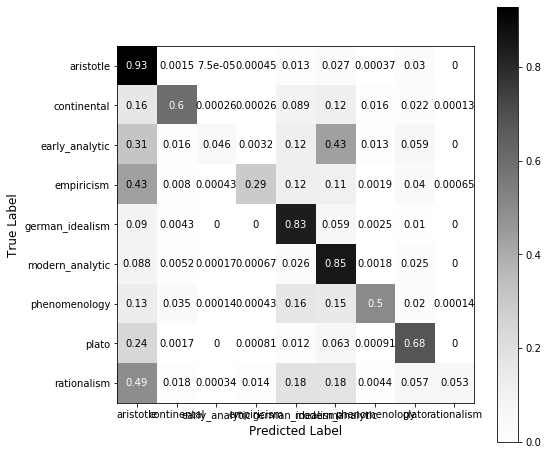

In [37]:
from sklearn.metrics import plot_confusion_matrix

plot_pretty_cf(nb_classifier, tf_idf_data_test, y_test)

In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, nb_test_preds)

0.6611789473684211

In [45]:
# random forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(tf_idf_data_train, y_train)
rf_train_preds = rf_classifier.predict(tf_idf_data_train)
rf_test_preds = rf_classifier.predict(tf_idf_data_test)

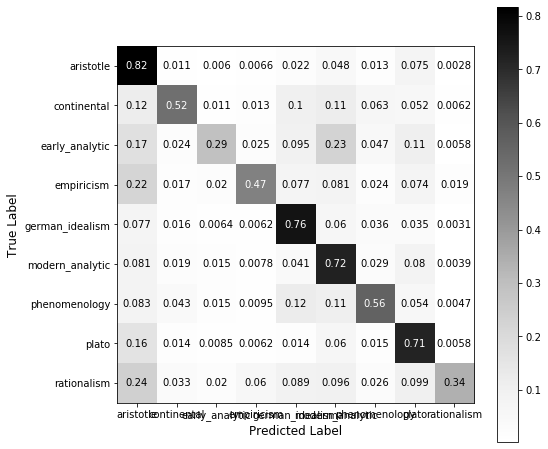

In [46]:
plot_pretty_cf(rf_classifier, tf_idf_data_test, y_test)

In [47]:
accuracy_score(y_test, rf_test_preds)

0.6486877192982456

In [35]:
def plot_pretty_cf(predictor, xtest, ytest, cmap='Greys', normalize='true', title=None):
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(predictor, xtest, ytest, cmap=cmap, normalize=normalize, ax=ax)
    ax.set_title(title, size='x-large')
    ax.set_xlabel('Predicted Label', size='large')
    ax.set_ylabel('True Label', size='large')
    plt.show()

In [32]:
import matplotlib.pyplot as plt

In [19]:
school_df.head()

,school,sentences
0,german_idealism,why this critique is titled a critique not of...
1,german_idealism,this critique is to establish merely that the...
2,german_idealism,here kant uses the term to refer to the work r...
3,german_idealism,schlechthin used informally here usually kant ...
4,german_idealism,i render this term—except where doing so would...


In [20]:
text_df.append(school_df)

,school,sentences
0,german_idealism,why this critique is titled a critique not of...
1,german_idealism,this critique is to establish merely that the...
2,german_idealism,here kant uses the term to refer to the work r...
3,german_idealism,schlechthin used informally here usually kant ...
4,german_idealism,i render this term—except where doing so would...
...,...,...
38507,german_idealism,to the rationality of right and law
38508,german_idealism,as a result theiropposition has faded away in ...
38509,german_idealism,the present has cast off its barbarism and unj...
38510,german_idealism,in the statethe selfconsciousness finds the ac...


In [ ]:
t =  '- but if the []above question presupposes\\n that a constitution is already present,  to draw up a  constitution can only mean to change it, and the very fact tha\\\ 3ii  \x0cphilosophy ojright a constitution is presupposed at once implies that this change could take place only in a constitutionalÂ£ m1234569870anner§.'

t.replace('\x0c', '')


In [ ]:
re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff\xad\x0c6§\[\]\\\£\Â\r0123456789]', '', t)


In [ ]:
for char in string.punctuation:
    t = t.replace(char, '')

t

In [ ]:
string.punctuation
b = list(string.punctuation)
b8 = []
for char in b:
    char += '8'
    b8.append(char)

b8

In [ ]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import wordcloud


In [ ]:
def make_word_cloud(text, stopwords=stopwords.words('english')):
    cloud = wordcloud.WordCloud(width=2000, 
                            height=1100, 
                            background_color='#D1D1D1', 
                            max_words=30, 
                            stopwords=stopwords, 
                            color_func=lambda *args, **kwargs: (0,0,0)).generate(text)
    return cloud


In [ ]:
text_dict.keys()

In [ ]:
cloud_dict = {}
for school in text_dict.keys():
    cloud_dict[school] = make_word_cloud(text_dict[school], stopwords_list)


In [ ]:
cloud_dict.keys()

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(25, 15))
fig.tight_layout(rect=[2, 2, 1, 3])
fig.suptitle('Word Clouds for Each School of Thought', size=40)
ax1.imshow(cloud_dict['plato'])
ax1.set_title('Plato Word Cloud', size=25, pad=20)
ax2.imshow(cloud_dict['aristotle'])
ax2.set_title('Aristotle Word Cloud', size=25, pad=20)
ax3.imshow(cloud_dict['rationalism'])
ax3.set_title('Rationalism Word Cloud', size=25, pad=20)
ax4.imshow(cloud_dict['empiricism'])
ax4.set_title('Empiricism Word Cloud', size=25, pad=20)
ax5.imshow(cloud_dict['german_idealism'])
ax5.set_title('German Idealism Word Cloud', size=25, pad=20)
ax6.imshow(cloud_dict['phenomenology'])
ax6.set_title('Phenomenology Word Cloud', size=25, pad=20)
ax7.imshow(cloud_dict['early_analytic'])
ax7.set_title('Early Analytic Word Cloud', size=25, pad=20)
ax8.imshow(cloud_dict['modern_analytic'])
ax8.set_title('Modern Analytic Word Cloud', size=25, pad=20)
ax9.imshow(cloud_dict['continental'])
ax9.set_title('Continental Word Cloud', size=25, pad=20)
for ax in fig.axes:
    ax.axis('off')
fig.patch.set_facecolor('#D1D1D1')
plt.show()


In [26]:
stopwords_list = stopwords.words('english')
custom_stopwords = ['–', 'also', 'something', 'cf', 'thus', 'two', 'now', 'would', 'make', 'eb', 'u', 'well', 'even', 'said', 'eg', 'us',
                    'n', 'sein', 'e', 'da', 'therefore', 'however', 'would', 'thing', 'must', 'merely', 'way', 'since', 'latter', 'first',
                    'B', 'A', 'mean', 'upon', 'yet', 'cannot', 'c', 'C', 'let', 'may', 'might']

stopwords_list += custom_stopwords